In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown='ignore'), ["sex", "smoker", "region"])
)

#Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Now transform training data and testing data to normalize
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal.shape, y_train.shape, X_test_normal.shape, y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [ ]:
#Now lets build a neural network model and see how it goes
tf.random.set_seed(42)

insurance_model3 = tf.keras.models.Sequential([
                                               tf.keras.layers.Dense(units=150),
                                               tf.keras.layers.Dense(units=75),
                                               tf.keras.layers.Dense(units=10),
                                               tf.keras.layers.Dense(units=1)
])
insurance_model3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=tf.keras.metrics.mae)

history = insurance_model3.fit(X_train_normal, y_train, epochs=300, verbose=1)

Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 11501.3047 - mean_absolute_error: 11501.3047
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 7556.9946 - mean_absolute_error: 7556.9946
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 5439.2134 - mean_absolute_error: 5439.2134
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 3789.0291 - mean_absolute_error: 3789.0291
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 3666.5356 - mean_absolute_error: 3666.5356
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 3639.9470 - mean_absolute_error: 3639.9470
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 3611.4033 - mean_absolute_error: 3611.4033
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 3669.5002 - mean_absolute_error: 3669.5002
Epoch 9/300
34/34 [==============================] - 0s 2ms/step - los

In [ ]:
#Evaluate the larger model now with normalised data
insurance_model3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3195.8855 - mean_absolute_error: 3195.8855


[3195.885498046875, 3195.885498046875]

Text(0, 0.5, 'loss')

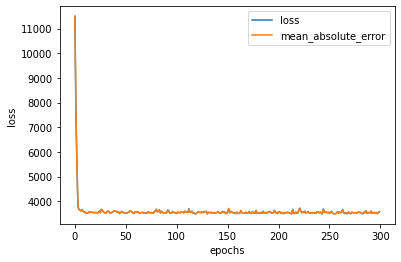

In [ ]:
#Now plot the history
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")